In [ ]:
#transfer learning technique

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
train_path="/content/drive/MyDrive/Datasets/Datasets/Train"
test_path="/content/drive/MyDrive/Datasets/Datasets/Test"

In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [8]:
for layer in resnet.layers:
    layer.trainable = False

In [9]:
folders = glob("/content/drive/MyDrive/Datasets/Datasets/Train/*")
folders 




['/content/drive/MyDrive/Datasets/Datasets/Train/lamborghini',
 '/content/drive/MyDrive/Datasets/Datasets/Train/audi',
 '/content/drive/MyDrive/Datasets/Datasets/Train/mercedes']

In [10]:
x = Flatten()(resnet.output)

In [11]:

prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Datasets/Datasets/Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Datasets/Datasets/Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 34s 25s/step - loss: 3.5630 - accuracy: 0.3333 - val_loss: 13.5778 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 671ms/step - loss: 10.1679 - accuracy: 0.3542 - val_loss: 3.1539 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 1s 666ms/step - loss: 4.1270 - accuracy: 0.3333 - val_loss: 3.5576 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 1s 663ms/step - loss: 2.9044 - accuracy: 0.3542 - val_loss: 1.4020 - val_accuracy: 0.2586
Epoch 5/50
2/2 [==============================] - 1s 676ms/step - loss: 1.0946 - accuracy: 0.4896 - val_loss: 1.9203 - val_accuracy: 0.4483
Epoch 6/50
2/2 [==============================] - 1s 679ms/step - loss: 2.1629 - accuracy: 0.5000 - val_loss: 1.5931 - val_accuracy: 0.5862
Epoch 7/50
2/2 [==============================] - 1s 676ms/step - loss: 1.5520 - accuracy: 0.5208 - val_loss: 2.1160 - val_accuracy: 0.1897
Epoch 8/50
2/2 [===

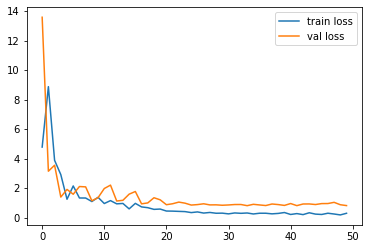

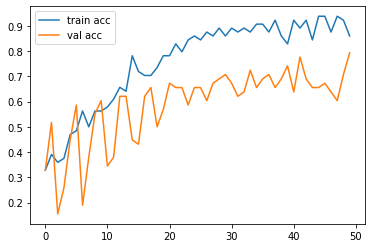

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[8.41643065e-02, 4.10137512e-02, 8.74821901e-01],
       [7.10698247e-01, 2.87395686e-01, 1.90606865e-03],
       [3.69806364e-02, 5.13554335e-01, 4.49465007e-01],
       [9.20433551e-03, 9.67658222e-01, 2.31374484e-02],
       [1.15334084e-02, 9.87706482e-01, 7.60101655e-04],
       [3.44511904e-02, 4.43499595e-01, 5.22049189e-01],
       [1.12135662e-02, 9.73121524e-01, 1.56649873e-02],
       [1.04190810e-02, 9.43551421e-01, 4.60295081e-02],
       [7.59386504e-03, 9.47454751e-01, 4.49513532e-02],
       [4.09119204e-03, 9.89856601e-01, 6.05218159e-03],
       [1.87713075e-02, 8.63332391e-01, 1.17896289e-01],
       [9.51834992e-02, 7.40353405e-01, 1.64463118e-01],
       [6.72106892e-02, 6.14783540e-03, 9.26641464e-01],
       [6.45669829e-03, 9.80521917e-01, 1.30213946e-02],
       [4.48628701e-03, 9.69520986e-01, 2.59927064e-02],
       [8.52177262e-01, 1.09475315e-01, 3.83473933e-02],
       [8.73190090e-02, 5.63058019e-01, 3.49622965e-01],
       [4.77788353e-06, 2.60985

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:

y_pred

array([2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0])

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [43]:
model=load_model('model_resnet50.h5')
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
image.ImageDataGenerator()

image.load_img()

TypeError: ignored

In [44]:

img_data

NameError: ignored

In [47]:
img=image.load_img("/content/drive/MyDrive/Datasets/Datasets/Test/lamborghini/11.jpg",target_size=(224,224))
x=image.img_to_array(img)
x


array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [48]:
x.shape


(224, 224, 3)

In [49]:
x=x/255


In [52]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 1, 1, 224, 224, 3)

In [53]:
model.predict(img_data)



ValueError: ignored

In [54]:
a=np.argmax(model.predict(img_data), axis=1)
a==1

ValueError: ignored